# PHYS591000 Lab 06
--- 
## Goal
In this Lab 06, you will practice:

* Support Vector Machine 

* Decision Tree Classifier

* Artificial Neural Network

and how to apply these method on a binary classification problem.

## Introduction

* We will take the spectrum energy density data from "Spitzer From Molecular Cores to Planet-Forming Disks (C2D)" project for the classification task.

* The spectrum energy data contains three Spitzer instruments (IRAC, MIPS, and IRS).

* We will use scikit-learn packages: SVC, DecisionTreeClassifier, MLPClassifier for classification problem.

* All training data and testing data are prepared in data input.
---
* Data format:
  * x_data : 16 features
      * 0~7 : spectrum energy distribution (SED) for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.
      * 8~15 : detection error for J, H, K, IRAC1, IRAC2, IRAC3, IRAC4, MIPS1.

  * y_data : one-hot labels (0: star, 1: galaxy, 2: young stellar object).


---
* Bonus: Find a way to show which feature is the most important in data input.

* REF: [c2d project](https://irsa.ipac.caltech.edu/data/SPITZER/C2D/index.html)
* REF: [Understanding Decision Tree](https://towardsdatascience.com/understanding-decision-trees-once-and-for-all-2d891b1be579)
* REF: [DecisionTree](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)




In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import random

random.seed(123)
np.random.seed(123)

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pickle
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week06/yso_lab.pickle
/kaggle/input/phys591000-week06/SED_IRAC4.pickle
/kaggle/input/phys591000-week06/SED_c2d_data.pickle


# Exercise 1
## 1.1 Load yso_lab.pickle and build SVM.
* Load data from "yso_lab.pickle" and save in x_train, x_test, y_train, y_test.
* Print the number of feature for: x_train, x_test
* Remember to turn y_train, y_test to 1-D array from one-hot representation.
* Build up SVM.
* train your model with x_train, y_train. 

In [2]:
##############################################################################
# Code for 1.1

# 1. Load data from "yso_lab.pickle" and save in x_train, x_test, y_train, y_test.

# 2. Print the number of feature for: x_train, x_test.
# (Remember to turn y_train, y_test to 1-D array from one-hot representation.)

# 3. Build up SVM model.

# 4. train your model with x_train, y_train.

##############################################################################
# Please code in this cell

with open('/kaggle/input/phys591000-week06/yso_lab.pickle','rb') as f:
    data = pickle.load(f)

print(type(data))
print(data.keys())

x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

print('x_train shape: ', x_train.shape)
print('x_test shape:  ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape:  ', y_test.shape)

# 3. Build up SVM model.

y_train_flat = []
for row in y_train:
    y_train_flat.append(np.argmax(row))

y_test_flat = []
for row in y_test:
    y_test_flat.append(np.argmax(row))

# ----- Setup model and train -----
model_svm = SVC(kernel='linear', C=1)
clf = model_svm.fit(x_train,y_train_flat)

##############################################################################

<class 'dict'>
dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])
x_train shape:  (1836, 16)
x_test shape:   (460, 16)
y_train shape:  (1836, 3)
y_test shape:   (460, 3)


## 1.2 Test your model and print out the confusion matrix.

* Print out the training score.
* Print out the testing score.
* Get the model prediction and create a confusion matrix.

Training Score:  0.9771241830065359
Testing Score:  0.9847826086956522


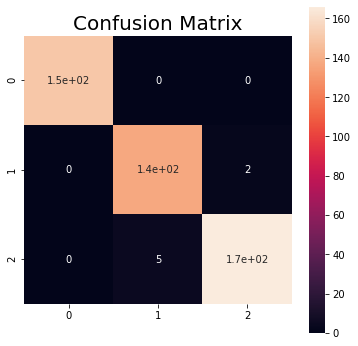

In [3]:
##############################################################################
# Code for 1.2

# 1. Print out the training score.

# 2. Print out the testing score.

# 3. Get the model's prediction as 'y_pred'.

# 4.Please use 'y_pred' and 'y_test' to create a confusion matrix.

##############################################################################
# Please code in this cell

# ----- Evaluate model -----
print('Training Score: ',model_svm.score(x_train, y_train_flat))
print('Testing Score: ', model_svm.score(x_test, y_test_flat))

y_predict_svm = model_svm.predict(x_test)
    
# Plot non-normalized confusion matrix

cmatrix_train_svm = confusion_matrix(y_test_flat, y_predict_svm)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train_svm, square=True, annot=True, ax=ax)
plt.show()

##############################################################################

In [4]:
model_svm.coef_

array([[ 4.58459140e-02, -6.29240747e-02,  6.16635924e-03,
         9.85535186e-02,  1.21059490e-01,  3.43911168e-01,
        -8.44140649e-01, -3.41022797e+00,  1.54716427e-01,
         2.33062095e-01,  1.91404844e-01,  5.99623230e-01,
         4.54192772e-01,  5.19697056e-01,  5.49175759e-01,
         3.09315233e+00],
       [-7.33649510e-03,  4.21971158e-03,  2.94822451e-02,
         2.43646764e-03,  7.81090783e-02,  4.11894516e-01,
        -8.81939836e-01, -1.98761680e+00,  6.71120495e-02,
        -1.61624843e-01,  9.28815221e-02,  1.71349000e-01,
         2.51733038e-01,  1.22386638e-01,  1.29288994e-01,
         8.34221759e-02],
       [-6.35345222e-02,  4.60188447e-01, -9.98528400e-02,
        -6.58039593e-01, -8.59629212e-01,  5.94969796e-02,
         1.74570628e-01, -5.76783931e-02, -4.56890805e-01,
        -4.07037642e-01, -3.71901540e-01, -3.82579998e-01,
         8.11723636e-02,  8.90415711e-02, -2.24335148e-01,
        -4.68933478e-01]])

# Exercise 2
## 2.1 Decision tree
* Build up a decision tree model with depth=5 (set max_depth=5).
* Train your model with x_train, y_train.
* print the training score and testing score.
* Visualize the tree structure.

Training Score:  0.9836601307189542
Testing Score:  0.9652173913043478


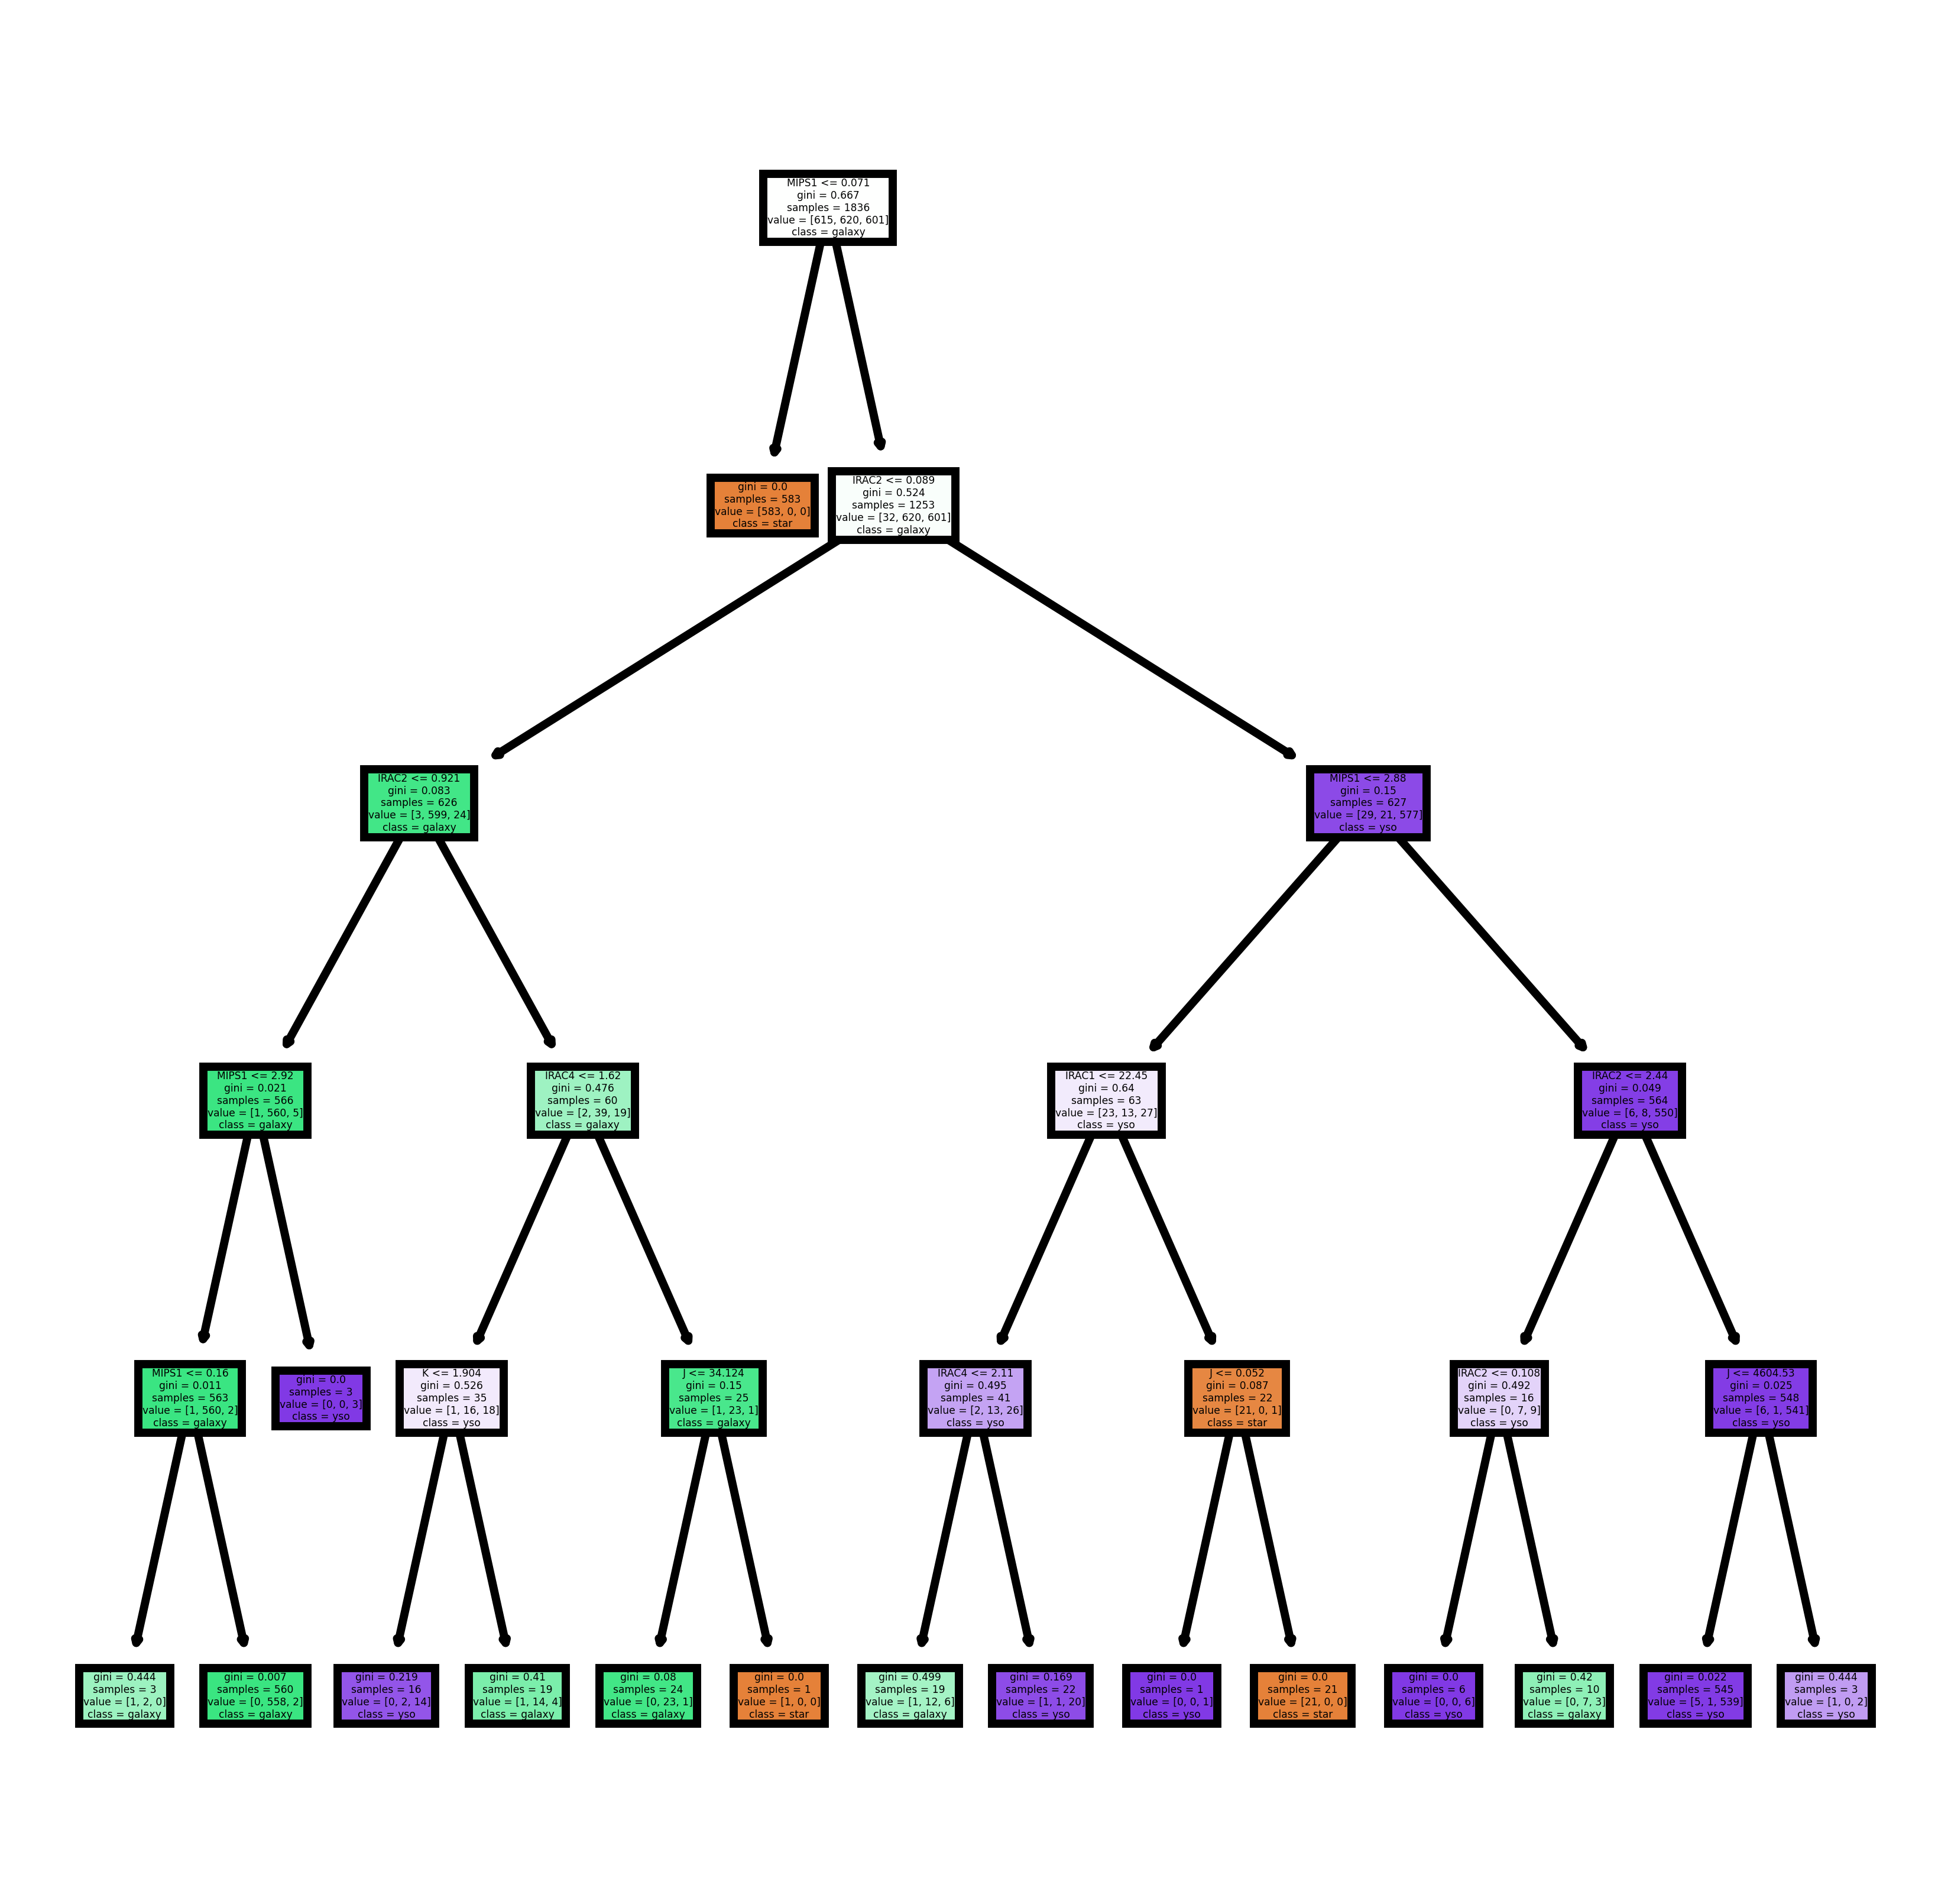

In [5]:
##############################################################################
#Code for 2.1

# 1. Build up a decision tree model with depth=5 (set max_depth=5).

# 2. Train your model with x_train, y_train.

# 3. print the training score and testing score.

# 4. Visualize the tree structure.
##############################################################################
# Please code in this cell

# Set desicion tree
tree_model_depth5 = tree.DecisionTreeClassifier(max_depth = 5)
tree_model_depth5.fit(x_train, y_train_flat)

feature_name = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1','J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1']
classes = ['star','galaxy','yso']

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model_depth5, feature_names = feature_name, class_names = classes, filled=True)

# Evaluate model
print('Training Score: ', tree_model_depth5.score(x_train,y_train_flat))
print('Testing Score: ', tree_model_depth5.score(x_test, y_test_flat))

##############################################################################

## 2.2
* Try to remove the limit of depth and rebuild the model (you don't need to set max_depth this time)
* Train your model and test it.
* Print out the training score and testing score.

In [6]:
##############################################################################
#Code for 2.2

# 1. Try to remove the limit of depth and rebuild the model.
# (You don't need to set 'max_depth' this time)

# 2. Train your model and give it a test.

# 3. Print out the training score and testing score.
##############################################################################
# Please code in this cell

# Set desicion tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(x_train, y_train_flat)

feature_name = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1','J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'MIPS1']
classes = ['star','galaxy','yso']

# Evaluate model
print('Training Score: ', tree_model.score(x_train,y_train_flat))
print('Testing Score: ', tree_model.score(x_test, y_test_flat))

##############################################################################

Training Score:  1.0
Testing Score:  0.9695652173913043


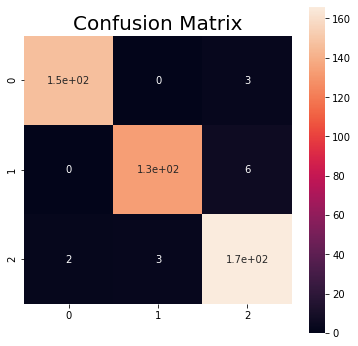

In [7]:
y_predict_tree = tree_model.predict(x_test)
    
# Plot non-normalized confusion matrix

cmatrix_train_tree = confusion_matrix(y_test_flat, y_predict_tree)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train_tree, square=True, annot=True, ax=ax)
plt.show()

## 2.3
* How many layers of the decision tree above? (Visualize)
* Will a deeper model get a better performance?

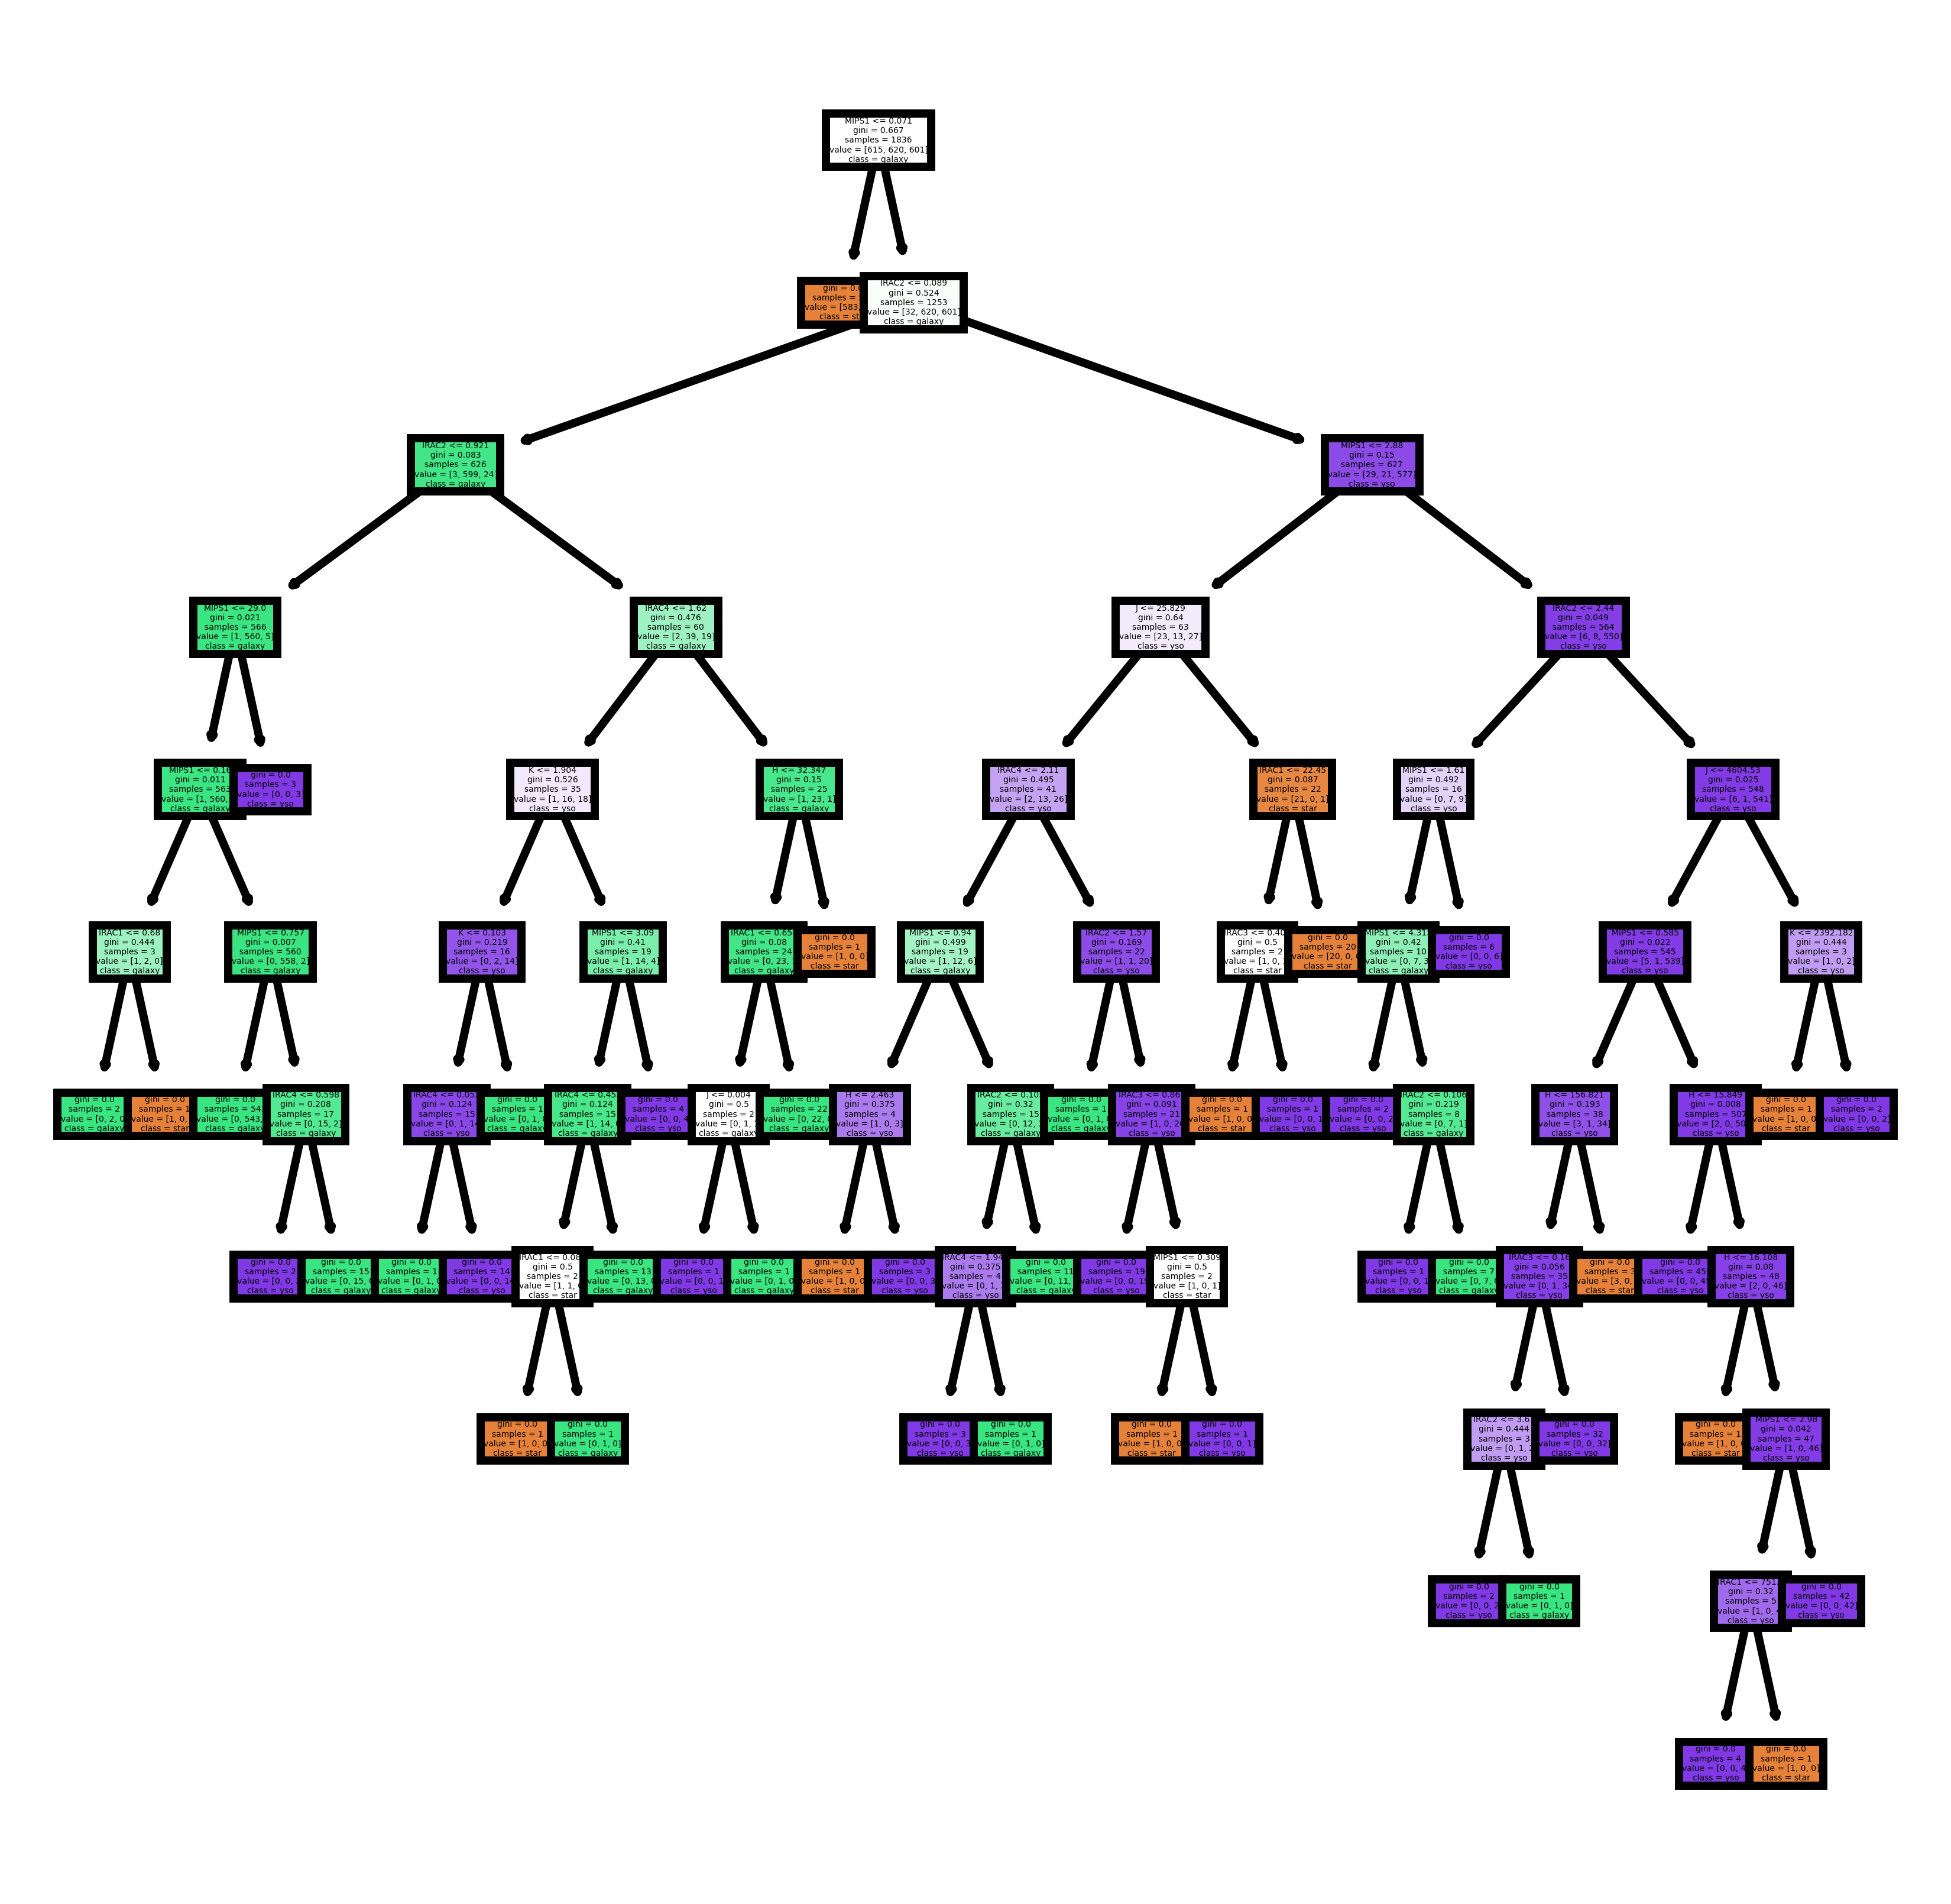

There are 10 layers in the decision tree above.
Training Score with depth 5 :  0.9836601307189542
Testing Score with depth 5 :  0.9652173913043478
Training Score with depth  10 : 1.0
Testing Score with depth  10 : 0.9695652173913043
With the increase of layers in decision tree, we can do more perfectly fit through trainning data, as well as testing data, while it may takes much more time to do the fitting and maybe overfitting.


In [8]:
##############################################################################
#Code for 2.3

# 1. Give your tree model a visualization,
#.   how many layers of the decision tree do you get?

# 2. Will a deeper model get a better performance? 
#.   Discuss about the benedits of increasing the number of layers.

##############################################################################
# Please code in this cell

# Plot tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, feature_names = feature_name, class_names = classes, filled=True)
plt.show()

# Comparison

depth = tree_model.get_depth()
print('There are',depth,'layers in the decision tree above.')

print('Training Score with depth 5 : ', tree_model_depth5.score(x_train,y_train_flat))
print('Testing Score with depth 5 : ', tree_model_depth5.score(x_test, y_test_flat))
print('Training Score with depth ',depth,':',tree_model.score(x_train,y_train_flat))
print('Testing Score with depth ', depth,':',tree_model.score(x_test, y_test_flat))
print('With the increase of layers in decision tree, we can do more perfectly fit through trainning data, as well as testing data, while it may takes much more time to do the fitting and maybe overfitting.')

##############################################################################

## 2.4
* Use the decision tree model above to predict 'y_pred' with 'x_test'.
* Plot a confusion matrix.

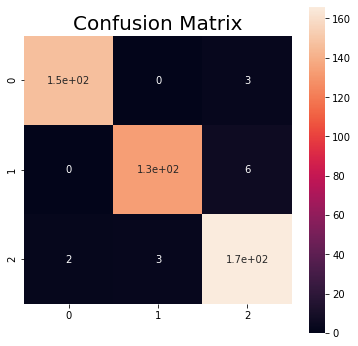

In [9]:
##############################################################################
#Code for 2.4

# 1. Use the decision tree model above to predict 'y_pred' with 'x_test'.

# 2. Plot the confusion matrix.
##############################################################################
# Please code in this cell

y_predict_tree = tree_model.predict(x_test)
    
# Plot non-normalized confusion matrix

cmatrix_train_tree = confusion_matrix(y_test_flat, y_predict_tree)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train_tree, square=True, annot=True, ax=ax)
plt.show()

##############################################################################

# Exercise 3
## 3.1 Artificial Neuron Network
* Build two models by MLP Classifier.
* One with solver='sgd'（optimizer)
* The other with solver='adam'（optimizer)
* Train each of your model.
* Print out the training score and testing score, respectively.

In [10]:
##############################################################################
#Code for 3.1

# 1. Build two models by MLP Classifier with no hidden layer,
#.   with basically just input layer and output layer.
#.   One with solver='sgd'（optimizer)
#.   The other with solver='adam'（optimizer)

# 2. Train each of your model.

# 3. Print out the training score and testing score, respectively.

##############################################################################
# Please code in this cell

iteration = 10000 # In order to well trained your model, you need to give enough iterations times.

model_sgd = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=iteration, solver='sgd')
model_sgd.fit(x_train, y_train_flat)

model_adam = MLPClassifier(hidden_layer_sizes=(), activation='relu', max_iter=iteration, solver='adam')
model_adam.fit(x_train, y_train_flat)

# Evaluate model
print('Training Score (sgd): ', model_sgd.score(x_train, y_train_flat))
print('Testing Score (sgd): ', model_sgd.score(x_test, y_test_flat))

print('Training Score (adam): ', model_adam.score(x_train, y_train_flat))
print('Testing Score (adam): ', model_adam.score(x_test, y_test_flat))


##############################################################################

Training Score (sgd):  0.9384531590413944
Testing Score (sgd):  0.9347826086956522
Training Score (adam):  0.9455337690631809
Testing Score (adam):  0.9434782608695652


## 3.2
* Please explain the principle of optimizer 'sgd' and 'adam' in brief. What's the main difference between them?
* Which optimizer works better on your model? Can you give an explanation?

In [11]:
##############################################################################
#Code for 3.2

# 1. Please explain the principle of optimizer 'sgd' and 'adam' in brief. 
#.   What's the main difference between them?

# 2. Which optimizer('sgd' and 'adam') works better on your model? Give it an explanation.

##############################################################################
# Please answer in this cell:

# Stochatic gradient descent (sgd) is using gradient of parameters to calculate loss function, and minimizing the loss function.
# Adaptive optimizer (adadm) is using RMSProp with momentum, which combine various advantages of different learning machine.

# In our model, solver 'sgd' works better than 'adam' However, solver 'sgd' usually occillates, so the result often changes.
# It may run in local minimum, while we don't expect of this result. It is the disadvantage of this solver.

##############################################################################

## 3.3
* Try to add a hidden layer with n neuron (you can set hidden_layer_sizes=(n,)). Will you get a better result?
* Print out 'training score' and 'testing score'.
* Build a best performed ANN model and print out the confusion matrix.

Training Score (sgd):  0.9133986928104575
Testing Score (sgd):  0.8934782608695652
Training Score (adam):  0.9689542483660131
Testing Score (adam):  0.9630434782608696
Yes, we get a better result!


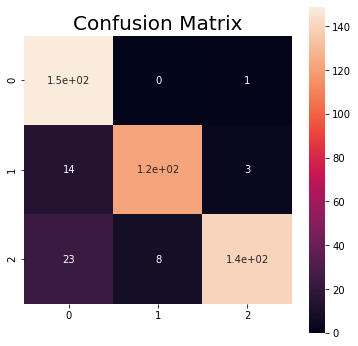

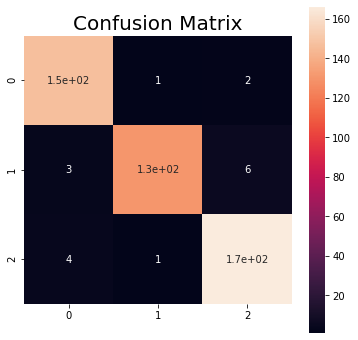

In [12]:
##############################################################################
#Code for 3.3

# 1. Try to add one hidden layer with n neurons (Hint: set 'hidden_layer_sizes'). 
# Will you get a better result? Pick n (4,8,12).

# 2. Print out 'training score' and 'testing score', respectively.

# 3. Build a best performed ANN model and Print out the confusion matrix.
##############################################################################
# Please answer in this cell:

iteration = 10000 # In order to well trained your model, you need to give enough iterations times.

model_sgd = MLPClassifier(hidden_layer_sizes=(4,8,12), activation='relu', max_iter=iteration, solver='sgd')
model_sgd.fit(x_train, y_train_flat)

model_adam = MLPClassifier(hidden_layer_sizes=(4,8,12), activation='relu', max_iter=iteration, solver='adam')
model_adam.fit(x_train, y_train_flat)

# Evaluate model
print('Training Score (sgd): ', model_sgd.score(x_train, y_train_flat))
print('Testing Score (sgd): ', model_sgd.score(x_test, y_test_flat))

print('Training Score (adam): ', model_adam.score(x_train, y_train_flat))
print('Testing Score (adam): ', model_adam.score(x_test, y_test_flat))

print('Yes, we get a better result!')

y_predict_sgd = model_sgd.predict(x_test)
    
# Plot non-normalized confusion matrix

cmatrix_train_sgd = confusion_matrix(y_test_flat, y_predict_sgd)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train_sgd, square=True, annot=True, ax=ax)
plt.show()

y_predict_adam = model_adam.predict(x_test)
    
# Plot non-normalized confusion matrix

cmatrix_train_adam = confusion_matrix(y_test_flat, y_predict_adam)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train_adam, square=True, annot=True, ax=ax)
plt.show()

##############################################################################

# Exercise 4
## Compare the result of SVM, Decision Tree, Artificial Neural Network.
* Compare the result in 1.2, 2.2, 3.3.
* Discuss which model works well in this dataset. Why?

In [13]:
##############################################################################
# Please answer part 4 in this cell:

# 1. Compare the result in 1.2, 2.2, 3.3.

# 2. Discuss which model works well in this dataset. Why?
##############################################################################
# Please answer in this cell:

# 1.2
print('Training Score (svm): ', model_svm.score(x_train,y_train_flat))
print('Testing Score (svm): ', model_svm.score(x_test, y_test_flat))
# 2.2
print('Training Score (tree): ', tree_model.score(x_train,y_train_flat))
print('Testing Score (tree): ', tree_model.score(x_test, y_test_flat))
# 3.3
print('Training Score (ANN/adam): ', model_adam.score(x_train, y_train_flat))
print('Testing Score (ANN/adam): ', model_adam.score(x_test, y_test_flat))

print("We get the best result on SVM. Decision tree seems to be overtrained so the testing score is worse. Besides, while ANN model also got a good performance, SVM is still better than it. ")
##############################################################################

Training Score (svm):  0.9771241830065359
Testing Score (svm):  0.9847826086956522
Training Score (tree):  1.0
Testing Score (tree):  0.9695652173913043
Training Score (ANN/adam):  0.9689542483660131
Testing Score (ANN/adam):  0.9630434782608696
We get the best result on SVM. Decision tree seems to be overtrained so the testing score is worse. Besides, while ANN model also got a good performance, SVM is still better than it. 


# Bonus
## Identify the importance of features in data input


It is commonly said that the decision-making process of machine learning is unclear, but some model has more interpretability than others.


In this lab, we use 16 features as input and decide data type. In 16 features, some of them are more important to others, that is, the model basically uses them to do the judgement. 


Can you tell us which of those features are more important?

* Hint: Think about which model has more interpretability, SVM, decision tree or ANN?


* REF: [Interpretability of Deep Learning Models](https://ieeexplore.ieee.org/document/8397411)
* REF: [(arXiv)Visual Interpretability for Deep Learning](https://arxiv.org/abs/1802.00614)

In [14]:
##############################################################################
#Bonus

with open("/kaggle/input/phys591000-week06/yso_lab.pickle", 'rb') as f:
    data = pickle.load(f)

x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']


y_train_flat = []

for row in y_train:
    y_train_flat.append(np.argmax(row))

y_test_flat = []
for row in y_test:
    y_test_flat.append(np.argmax(row))
    
for i in range(0,16):
    
    x_train, x_test = data['x_train'], data['x_test']
    x_train = np.delete(x_train,i,1)
    x_test = np.delete(x_test,i,1)

    tree_model = tree.DecisionTreeClassifier(max_depth = 5)
    tree_model.fit(x_train, y_train_flat)

    feature_name = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'Jer', 'Her', 'Ker', 'IRAC1er', 'IRAC2er', 'IRAC3er', 'IRAC4er', 'MIPS1er']
    classes = ['star','galaxy','yso']

    #fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
    #tree.plot_tree(tree_model, feature_names = feature_name, class_names = classes, filled=True)


    print('feature{}_Training Score: '.format(i), tree_model.score(x_train,y_train_flat))
    print('feature{}_Testing Score: '.format(i), tree_model.score(x_test, y_test_flat))



##############################################################################

feature0_Training Score:  0.9831154684095861
feature0_Testing Score:  0.9652173913043478
feature1_Training Score:  0.9831154684095861
feature1_Testing Score:  0.9717391304347827
feature2_Training Score:  0.9825708061002179
feature2_Testing Score:  0.9630434782608696
feature3_Training Score:  0.9831154684095861
feature3_Testing Score:  0.9652173913043478
feature4_Training Score:  0.9798474945533769
feature4_Testing Score:  0.9695652173913043
feature5_Training Score:  0.9836601307189542
feature5_Testing Score:  0.9695652173913043
feature6_Training Score:  0.9809368191721133
feature6_Testing Score:  0.9717391304347827
feature7_Training Score:  0.9330065359477124
feature7_Testing Score:  0.9
feature8_Training Score:  0.9831154684095861
feature8_Testing Score:  0.9717391304347827
feature9_Training Score:  0.9836601307189542
feature9_Testing Score:  0.9652173913043478
feature10_Training Score:  0.9831154684095861
feature10_Testing Score:  0.9717391304347827
feature11_Training Score:  0.98311

feature7_Training Score:  0.9330065359477124
feature7_Testing Score:  0.9


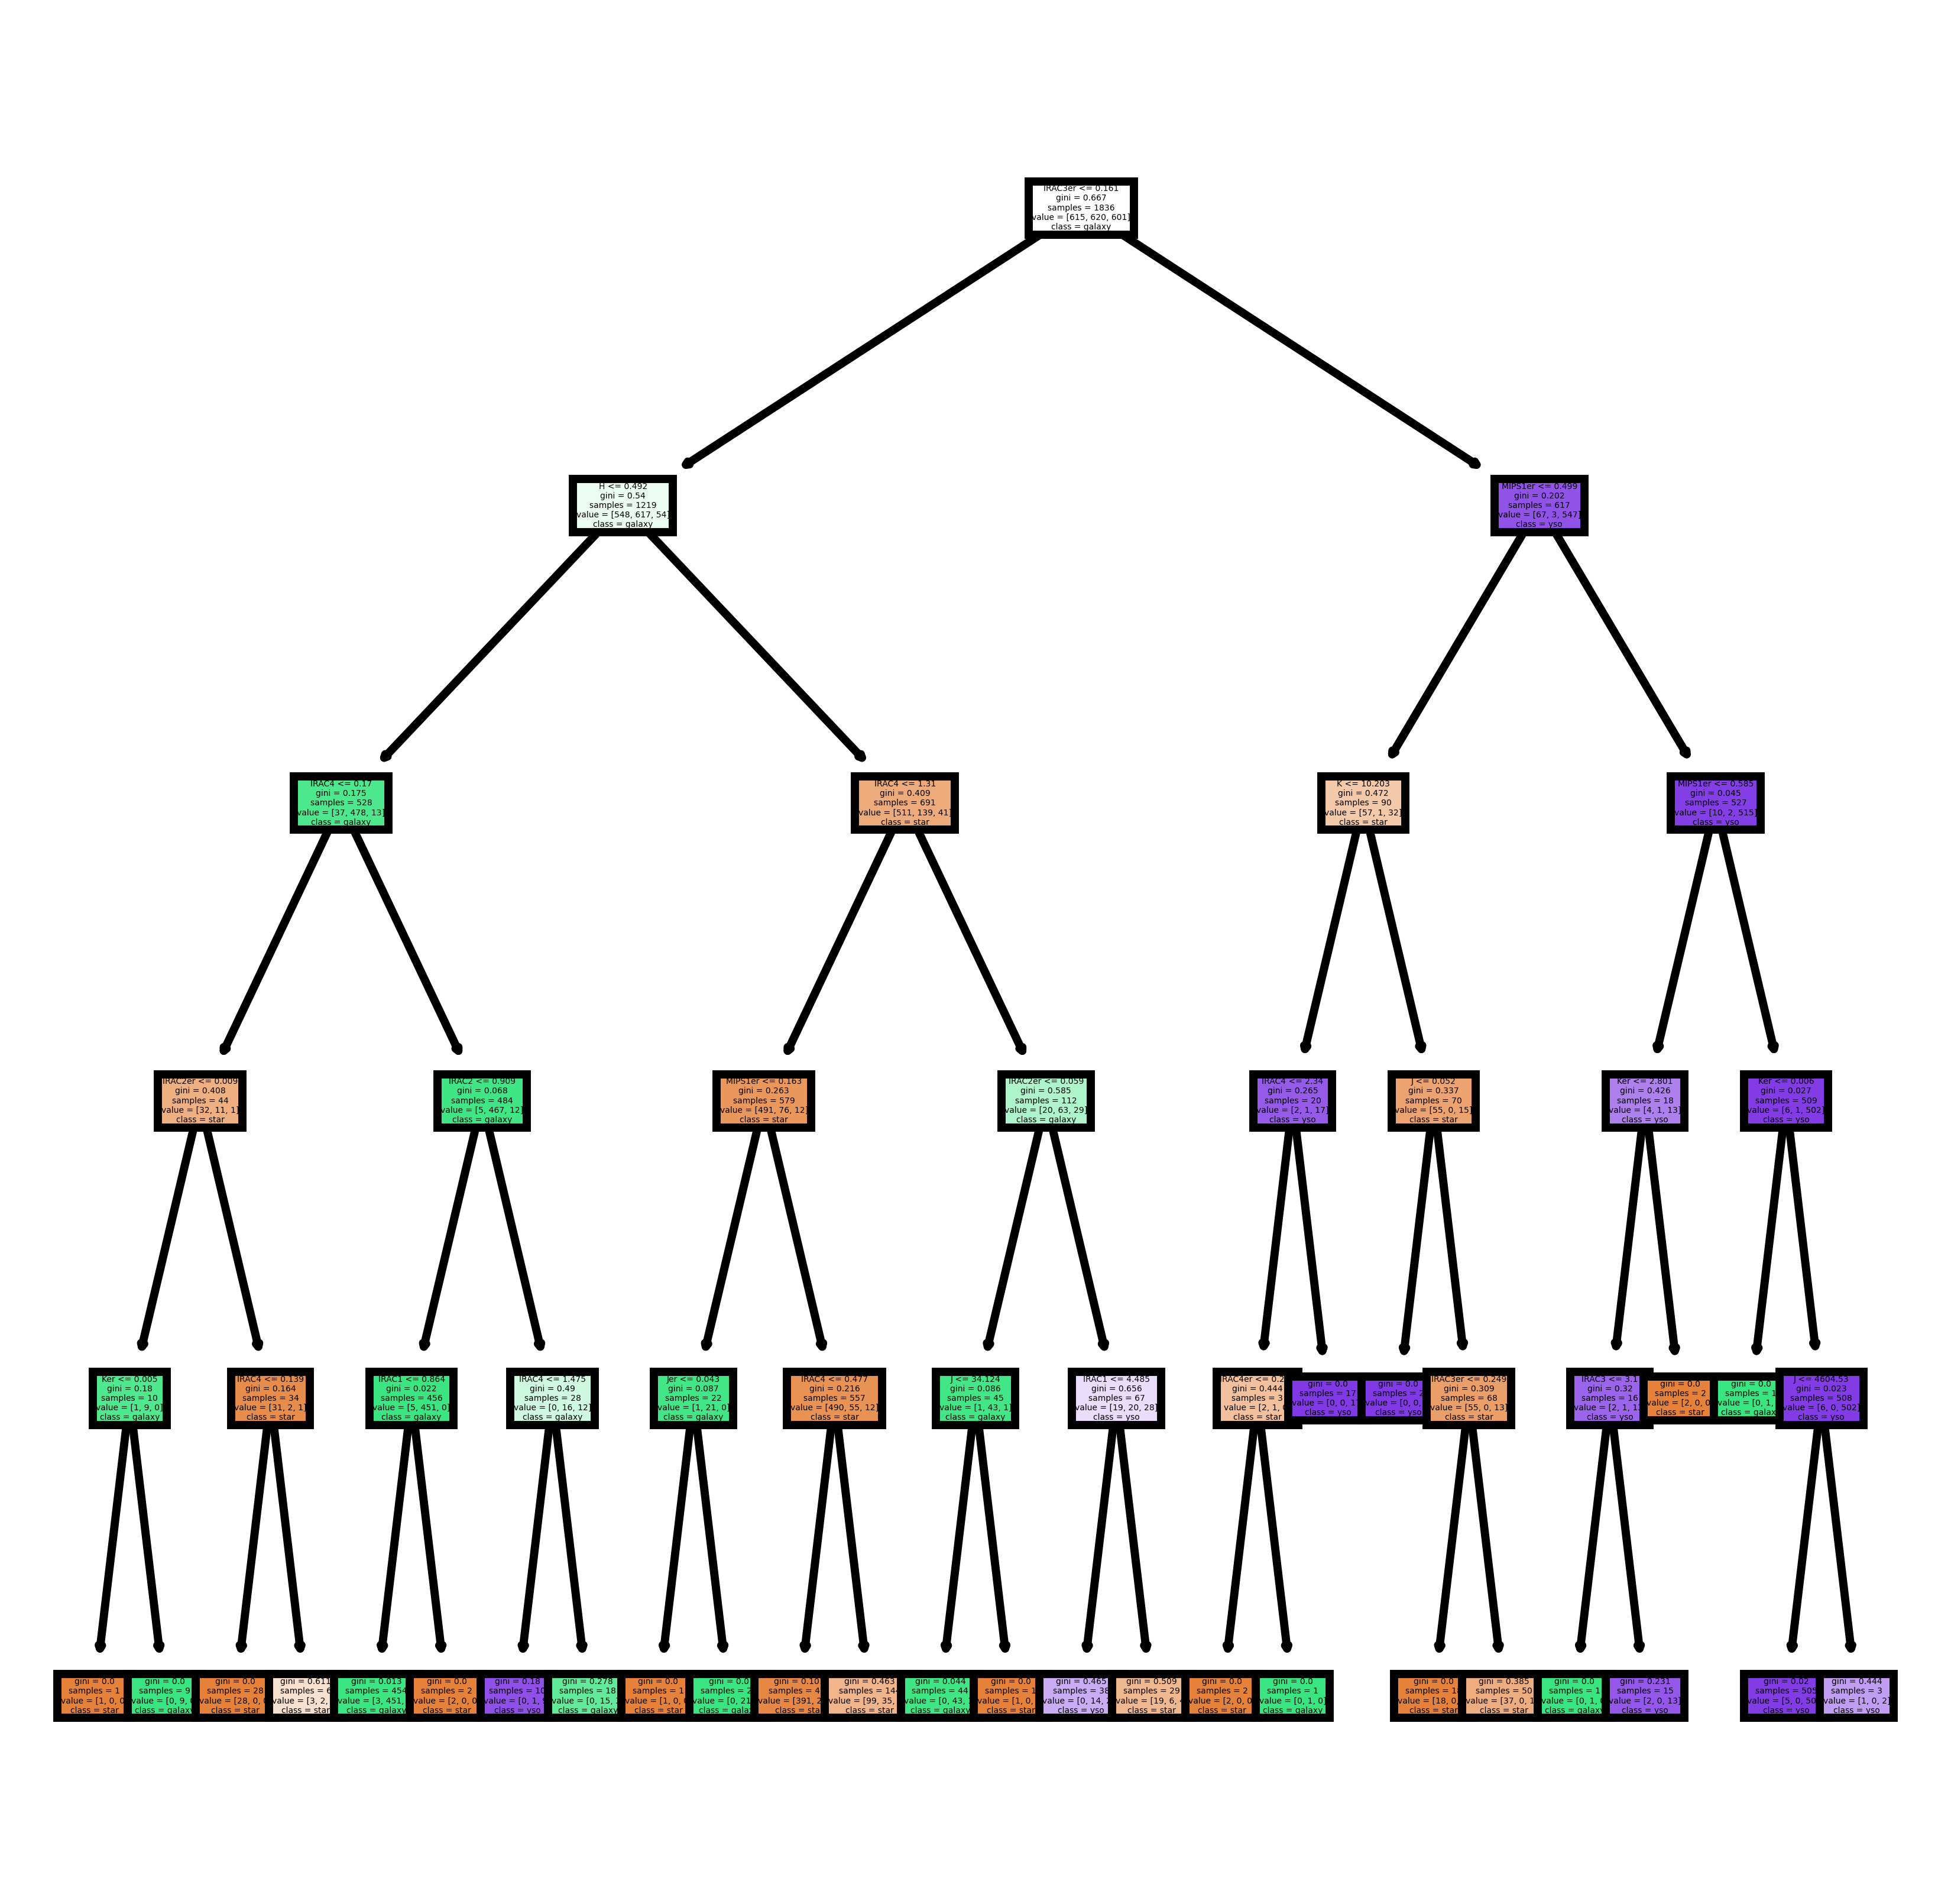

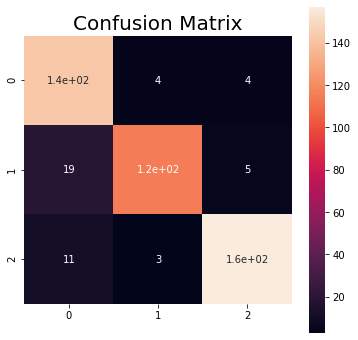

In [15]:
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

y_train_flat = []
for row in y_train:
    y_train_flat.append(np.argmax(row))

y_test_flat = []
for row in y_test:
    y_test_flat.append(np.argmax(row))
    
x_train = np.delete(x_train,7,1)
x_test = np.delete(x_test,7,1)

tree_model = tree.DecisionTreeClassifier(max_depth = 5)
tree_model.fit(x_train, y_train_flat)

feature_name = ['J', 'H', 'K', 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4', 'Jer', 'Her', 'Ker', 'IRAC1er', 'IRAC2er', 'IRAC3er', 'IRAC4er', 'MIPS1er']
classes = ['star','galaxy','yso']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
tree.plot_tree(tree_model, feature_names = feature_name, class_names = classes, filled=True)


print('feature7_Training Score: ', tree_model.score(x_train,y_train_flat))
print('feature7_Testing Score: ', tree_model.score(x_test, y_test_flat))


y_predict_tree = tree_model.predict(x_test)

cmatrix_train_adam = confusion_matrix(y_test_flat, y_predict_tree)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train_adam, square=True, annot=True, ax=ax)
plt.show()

When we observe the figure in 2.1, the first feature used to classify the data is 'MIPS1'. It almost seperates all 'star' from the whole data, which means that it reduces the loading to seperate them. Thus, we try to delete the features individually to see the importance of each one. From the score, it is obvious that the score decays when we delete 'MIPS1', and the conclusion meets our observation. 
Compare confusion matrix in bonus and 2.1, we also see that bonus one has worst result.